# EDA

In [4]:
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = './yoga-posture-cleaned/Yoga_combined - removed some'
folders = os.listdir(path)

In [6]:
listdict ={}

for folder in folders:
    newpath = f'{path}/{folder}'
    folderlist = os.listdir(newpath)
    num_img = len(folderlist)
    listdict[folder] = num_img

listdict

{'chair': 209,
 'cobra': 643,
 'downdog': 430,
 'goddess': 209,
 'tree': 362,
 'warrior': 183}

## Identifying Class Imbalance

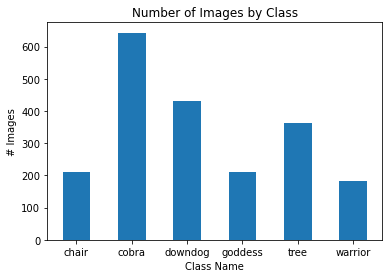

In [8]:
plt.bar(listdict.keys(), listdict.values(), width = .5);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');

## Plotting Image Size

In [38]:
from PIL import Image
import numpy as np
import pandas as pd

In [28]:
def get_dims(file):
    nfile = f'{filepath}/{file}'
    im = Image.open(nfile)
    arr = np.array(im)
    h,w,d = arr.shape
    return h,w

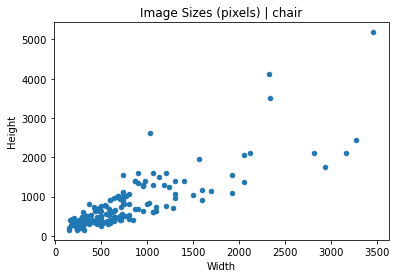

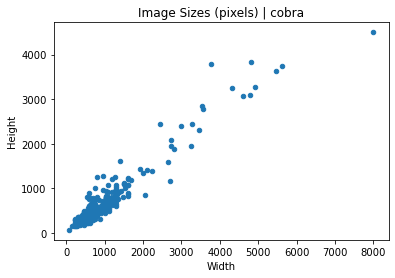

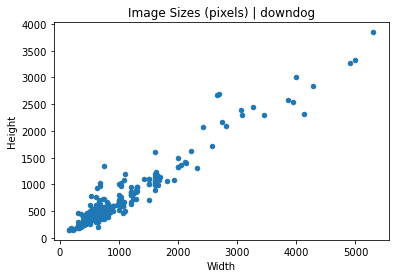

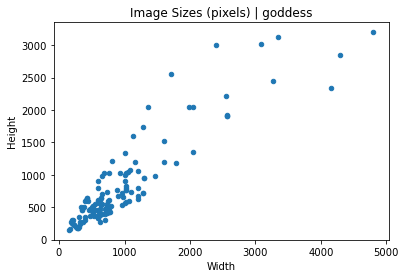

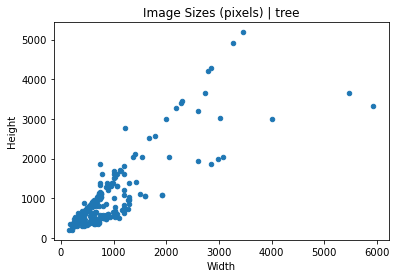

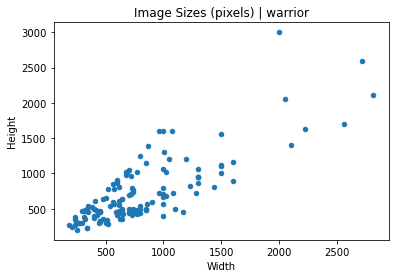

In [67]:
columns = ['filename','Height', 'Width']

for folder in listdict:
    filepath = f'{path}/{folder}'
    filelist = os.listdir(filepath)
    dims = []
    for i in range(len(filelist)):
        try:
            filedim = get_dims(filelist[i])
        except ValueError:
            pass
        except OSError:
            pass
        dims.append((filelist[i], filedim[0], filedim[1]))
        dim_df = pd.DataFrame(dims, columns=columns)
    sizes = dim_df.groupby(['Height', 'Width']).size().reset_index().rename(columns={0:'count'})
    sizes.plot.scatter(x='Width', y='Height');
    plt.title('Image Sizes (pixels) | {}'.format(folder))


## Viewing a Sampling of Images

In [80]:
from tensorflow.keras.preprocessing.image import load_img

2021-12-10 01:00:18.013166: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-10 01:00:18.013234: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


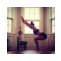

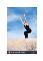

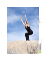

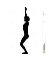

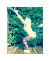

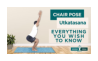

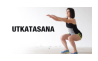

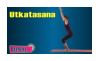

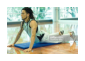

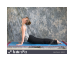

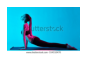

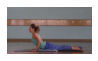

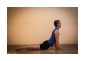

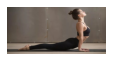

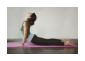

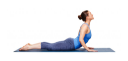

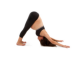

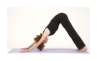

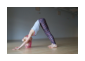

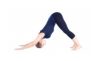

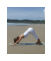

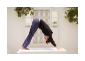

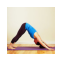

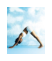

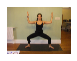

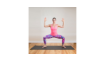

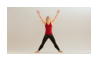

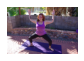

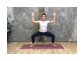

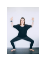

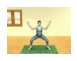

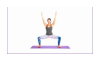

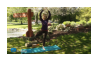

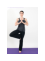

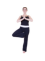

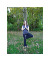

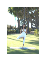

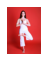

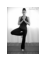

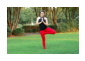

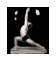

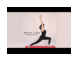

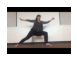

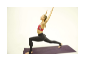

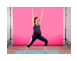

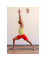

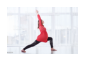

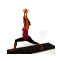

In [91]:
pic_num = 8

for folder in listdict:
    filepath = f'{path}/{folder}'
    filelist = os.listdir(filepath)
    for i in range(pic_num):
        fullname = f'{filepath}/{filelist[i]}'
        sp = plt.subplot(4, 2, i + 1)
        sp.axis('Off')
        img = load_img(fullname,(299,299))
        plt.imshow(img)
        plt.show()

## Generate Train, Validation dataset

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

2021-12-11 22:01:06.221410: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-11 22:01:06.221481: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input

In [6]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './yoga-posture-cleaned/train',
    target_size=(150, 150),
    batch_size=20,
    shuffle=False
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './yoga-posture-cleaned/validation',
    target_size=(150, 150),
    batch_size=20,
    shuffle=False
)

Found 1217 images belonging to 6 classes.
Found 405 images belonging to 6 classes.


# Models

## 1. CNN without inner layer

In [7]:
base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

base_model.trainable = False

#######################################
inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs, training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
outputs = keras.layers.Dense(6)(vectors)
model = keras.Model(inputs, outputs)
#######################################

optimizer = keras.optimizers.Adam(learning_rate=0.001)
loss = keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

#######################################

history = model.fit(train_ds, epochs=10, validation_data=val_ds)


2021-12-11 22:01:17.622471: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-12-11 22:01:17.622497: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (leila-Lenovo-Legion-5-15IMH05H): /proc/driver/nvidia/version does not exist
2021-12-11 22:01:17.623018: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
61/61 [==============================] - 40s 622ms/step - loss: 1.7512 - accuracy: 0.4347 - val_loss: 1.1424 - val_accuracy: 0.5778
Epoch 2/10
61/61 [==============================] - 38s 621ms/step - loss: 0.8687 - accuracy: 0.7141 - val_loss: 0.8268 - val_accuracy: 0.7210
Epoch 3/10
61/61 [==============================] - 40s 657ms/step - loss: 0.6358 - accuracy: 0.8118 - val_loss: 0.8035 - val_accuracy: 0.7630
Epoch 4/10
61/61 [==============================] - 38s 624ms/step - loss: 0.5204 - accuracy: 0.8422 - val_loss: 0.6913 - val_accuracy: 0.7778
Epoch 5/10
61/61 [==============================] - 38s 630ms/step - loss: 0.4249 - accuracy: 0.8751 - val_loss: 0.6229 - val_accuracy: 0.7975
Epoch 6/10
61/61 [==============================] - 39s 638ms/step - loss: 0.3637 - accuracy: 0.8956 - val_loss: 0.5522 - val_accuracy: 0.8222
Epoch 7/10
61/61 [==============================] - 37s 611ms/step - loss: 0.3235 - accuracy: 0.8981 - val_loss: 0.5169 - val_accuracy: 0.8469

**The Best Result is for epoch=10 ==> Val_accuracy=0.8593**

## 2. Adding one inner layer

### 2.1 Adding a Dense Layer with output=100 and ReLU Activation Function

In [8]:
base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

base_model.trainable = False

#######################################

inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs, training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
inner = keras.layers.Dense(100, activation='relu')(vectors)
outputs = keras.layers.Dense(6)(inner)
model = keras.Model(inputs, outputs)

#######################################

optimizer = keras.optimizers.Adam(learning_rate=0.001)
loss = keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

#######################################

history = model.fit(train_ds, epochs=10, validation_data=val_ds)


Epoch 1/10
61/61 [==============================] - 39s 610ms/step - loss: 1.8354 - accuracy: 0.3418 - val_loss: 1.2300 - val_accuracy: 0.5383
Epoch 2/10
61/61 [==============================] - 36s 593ms/step - loss: 0.8362 - accuracy: 0.7707 - val_loss: 0.7833 - val_accuracy: 0.7432
Epoch 3/10
61/61 [==============================] - 36s 595ms/step - loss: 0.5569 - accuracy: 0.8266 - val_loss: 0.6830 - val_accuracy: 0.7531
Epoch 4/10
61/61 [==============================] - 36s 597ms/step - loss: 0.4575 - accuracy: 0.8562 - val_loss: 0.6005 - val_accuracy: 0.7852
Epoch 5/10
61/61 [==============================] - 39s 622ms/step - loss: 0.3969 - accuracy: 0.8694 - val_loss: 0.5482 - val_accuracy: 0.8296
Epoch 6/10
61/61 [==============================] - 38s 625ms/step - loss: 0.2433 - accuracy: 0.9376 - val_loss: 0.5579 - val_accuracy: 0.8074
Epoch 7/10
61/61 [==============================] - 38s 622ms/step - loss: 0.1974 - accuracy: 0.9458 - val_loss: 0.5169 - val_accuracy: 0.8395

**The Best Result is for epoch=9 ==> Val_accuracy=0.8790**


### 2.2. Adding A Flatten Layer

In [10]:
base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

base_model.trainable = False

#######################################

inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs, training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
flatvectors = keras.layers.Flatten()(vectors)
inner = keras.layers.Dense(100, activation='relu')(flatvectors)
outputs = keras.layers.Dense(6)(inner)
model = keras.Model(inputs, outputs)

#######################################

optimizer = keras.optimizers.Adam(learning_rate=0.001)
loss = keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

#######################################

history = model.fit(train_ds, epochs=10, validation_data=val_ds)


Epoch 1/10
61/61 [==============================] - 41s 633ms/step - loss: 1.9950 - accuracy: 0.3517 - val_loss: 1.8349 - val_accuracy: 0.3605
Epoch 2/10
61/61 [==============================] - 37s 611ms/step - loss: 1.1696 - accuracy: 0.5859 - val_loss: 0.8648 - val_accuracy: 0.7309
Epoch 3/10
61/61 [==============================] - 38s 620ms/step - loss: 0.7497 - accuracy: 0.7790 - val_loss: 0.8666 - val_accuracy: 0.7136
Epoch 4/10
61/61 [==============================] - 38s 617ms/step - loss: 0.5374 - accuracy: 0.8389 - val_loss: 0.6313 - val_accuracy: 0.7852
Epoch 5/10
61/61 [==============================] - 39s 641ms/step - loss: 0.4450 - accuracy: 0.8735 - val_loss: 0.5709 - val_accuracy: 0.8000
Epoch 6/10
61/61 [==============================] - 37s 607ms/step - loss: 0.3714 - accuracy: 0.8940 - val_loss: 0.5163 - val_accuracy: 0.8321
Epoch 7/10
61/61 [==============================] - 37s 610ms/step - loss: 0.3190 - accuracy: 0.9006 - val_loss: 0.4753 - val_accuracy: 0.8395

**The Best Result is for epoch=9 ==> Val_accuracy=0.8494**


### 2.3 Change the Optimizer and use _SGD_

In [11]:
base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

base_model.trainable = False

#######################################

inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs, training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
flatvectors = keras.layers.Flatten()(vectors)
inner = keras.layers.Dense(100, activation='relu')(flatvectors)
outputs = keras.layers.Dense(6)(inner)
model = keras.Model(inputs, outputs)

#######################################

optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.8)
loss = keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

#######################################

history = model.fit(train_ds, epochs=10, validation_data=val_ds)


Epoch 1/10
61/61 [==============================] - 40s 617ms/step - loss: 1.6355 - accuracy: 0.3780 - val_loss: 1.3839 - val_accuracy: 0.5160
Epoch 2/10
61/61 [==============================] - 37s 607ms/step - loss: 1.1212 - accuracy: 0.6327 - val_loss: 1.0545 - val_accuracy: 0.6519
Epoch 3/10
61/61 [==============================] - 37s 606ms/step - loss: 0.8661 - accuracy: 0.7379 - val_loss: 0.8724 - val_accuracy: 0.7580
Epoch 4/10
61/61 [==============================] - 38s 616ms/step - loss: 0.6939 - accuracy: 0.8012 - val_loss: 0.8058 - val_accuracy: 0.7284
Epoch 5/10
61/61 [==============================] - 37s 610ms/step - loss: 0.5855 - accuracy: 0.8266 - val_loss: 0.7410 - val_accuracy: 0.7654
Epoch 6/10
61/61 [==============================] - 38s 623ms/step - loss: 0.5275 - accuracy: 0.8365 - val_loss: 0.7048 - val_accuracy: 0.7580
Epoch 7/10
61/61 [==============================] - 38s 626ms/step - loss: 0.4487 - accuracy: 0.8759 - val_loss: 0.6515 - val_accuracy: 0.7877

**The Best Result is for epoch=10 ==> Val_accuracy=0.8148**


### 2.4 Using the _SOFMAX_ activation function for the output layer

In [12]:
base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

base_model.trainable = False

#######################################

inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs, training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
flatvectors = keras.layers.Flatten()(vectors)
inner = keras.layers.Dense(100, activation='relu')(flatvectors)
outputs = keras.layers.Dense(6,activation='softmax')(inner)
model = keras.Model(inputs, outputs)

#######################################

optimizer = keras.optimizers.Adam(learning_rate=0.001)
loss = keras.losses.CategoricalCrossentropy(from_logits=False)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

#######################################

history = model.fit(train_ds, epochs=10, validation_data=val_ds)


Epoch 1/10
61/61 [==============================] - 42s 642ms/step - loss: 2.0625 - accuracy: 0.3887 - val_loss: 1.3167 - val_accuracy: 0.5630
Epoch 2/10
61/61 [==============================] - 37s 613ms/step - loss: 1.0290 - accuracy: 0.6820 - val_loss: 0.9417 - val_accuracy: 0.6741
Epoch 3/10
61/61 [==============================] - 37s 602ms/step - loss: 0.7125 - accuracy: 0.7576 - val_loss: 0.7194 - val_accuracy: 0.7556
Epoch 4/10
61/61 [==============================] - 37s 593ms/step - loss: 0.5749 - accuracy: 0.8069 - val_loss: 0.6577 - val_accuracy: 0.7531
Epoch 5/10
61/61 [==============================] - 36s 597ms/step - loss: 0.4319 - accuracy: 0.8529 - val_loss: 0.5684 - val_accuracy: 0.8247
Epoch 6/10
61/61 [==============================] - 37s 603ms/step - loss: 0.3769 - accuracy: 0.8833 - val_loss: 0.5142 - val_accuracy: 0.8420
Epoch 7/10
61/61 [==============================] - 37s 604ms/step - loss: 0.2769 - accuracy: 0.9228 - val_loss: 0.4659 - val_accuracy: 0.8370

**The Best Result is for epoch=8 ==> Val_accuracy=0.8790**

### 2.5 Using _MaxPooling2D_ to reduce the size of the feature map  

In [13]:
base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

base_model.trainable = False

#######################################

inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs, training=False)
vectors = keras.layers.MaxPooling2D(pool_size=(2,2))(base)
flatvectors = keras.layers.Flatten()(vectors)
inner = keras.layers.Dense(100, activation='relu')(flatvectors)
outputs = keras.layers.Dense(6)(inner)
model = keras.Model(inputs, outputs)

#######################################

optimizer = keras.optimizers.Adam(learning_rate=0.001)
loss = keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

#######################################

history = model.fit(train_ds, epochs=10, validation_data=val_ds)


Epoch 1/10
61/61 [==============================] - 41s 632ms/step - loss: 2.2892 - accuracy: 0.3993 - val_loss: 1.2753 - val_accuracy: 0.4914
Epoch 2/10
61/61 [==============================] - 36s 592ms/step - loss: 1.1597 - accuracy: 0.5193 - val_loss: 1.0658 - val_accuracy: 0.5704
Epoch 3/10
61/61 [==============================] - 36s 583ms/step - loss: 0.9876 - accuracy: 0.5842 - val_loss: 1.0217 - val_accuracy: 0.5753
Epoch 4/10
61/61 [==============================] - 36s 598ms/step - loss: 0.8904 - accuracy: 0.6343 - val_loss: 0.9509 - val_accuracy: 0.6049
Epoch 5/10
61/61 [==============================] - 37s 596ms/step - loss: 0.9080 - accuracy: 0.6475 - val_loss: 0.9387 - val_accuracy: 0.6568
Epoch 6/10
61/61 [==============================] - 37s 601ms/step - loss: 0.7807 - accuracy: 0.6352 - val_loss: 0.8935 - val_accuracy: 0.6000
Epoch 7/10
61/61 [==============================] - 37s 605ms/step - loss: 0.7421 - accuracy: 0.6450 - val_loss: 0.8822 - val_accuracy: 0.6099

**The Best Result is for epoch=5 ==> Val_accuracy=0.6568**

### 2.6 Using _SOFTMAX_ activation fuction for the output layer and _SGD_ for Optimization

In [14]:
base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

base_model.trainable = False

#######################################

inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs, training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
flatvectors = keras.layers.Flatten()(vectors)
inner = keras.layers.Dense(100, activation='relu')(flatvectors)
outputs = keras.layers.Dense(6,activation='softmax')(inner)
model = keras.Model(inputs, outputs)

#######################################

optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.8)
loss = keras.losses.CategoricalCrossentropy(from_logits=False)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

#######################################

history = model.fit(train_ds, epochs=10, validation_data=val_ds)


Epoch 1/10
61/61 [==============================] - 42s 656ms/step - loss: 1.7112 - accuracy: 0.3254 - val_loss: 1.3618 - val_accuracy: 0.5802
Epoch 2/10
61/61 [==============================] - 36s 590ms/step - loss: 1.2187 - accuracy: 0.5867 - val_loss: 1.0982 - val_accuracy: 0.6568
Epoch 3/10
61/61 [==============================] - 36s 593ms/step - loss: 0.9205 - accuracy: 0.7141 - val_loss: 0.9720 - val_accuracy: 0.6667
Epoch 4/10
61/61 [==============================] - 37s 593ms/step - loss: 0.7728 - accuracy: 0.7642 - val_loss: 0.8230 - val_accuracy: 0.7136
Epoch 5/10
61/61 [==============================] - 37s 601ms/step - loss: 0.6454 - accuracy: 0.7979 - val_loss: 0.7070 - val_accuracy: 0.7951
Epoch 6/10
61/61 [==============================] - 36s 595ms/step - loss: 0.5705 - accuracy: 0.8225 - val_loss: 0.6450 - val_accuracy: 0.8173
Epoch 7/10
61/61 [==============================] - 36s 596ms/step - loss: 0.4679 - accuracy: 0.8726 - val_loss: 0.6870 - val_accuracy: 0.7753

**The Best Result is for epoch=10 ==> Val_accuracy=0.8420**

### 2.7 Adding one more Dense layer with size=500 and _SeLU_ Activation Function

In [15]:
base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

base_model.trainable = False

#######################################

inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs, training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
flatvectors = keras.layers.Flatten()(vectors)
inner1 = keras.layers.Dense(500, kernel_initializer='lecun_normal',activation='selu')(flatvectors)
inner2 = keras.layers.Dense(100, activation='relu')(inner1)
outputs = keras.layers.Dense(6,activation='softmax')(inner2)
model = keras.Model(inputs, outputs)

#######################################

optimizer = keras.optimizers.Adam(learning_rate=0.001)
loss = keras.losses.CategoricalCrossentropy(from_logits=False)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

#######################################

history = model.fit(train_ds, epochs=10, validation_data=val_ds)


Epoch 1/10
61/61 [==============================] - 40s 608ms/step - loss: 2.0050 - accuracy: 0.3829 - val_loss: 1.3295 - val_accuracy: 0.5185
Epoch 2/10
61/61 [==============================] - 36s 596ms/step - loss: 1.0192 - accuracy: 0.6270 - val_loss: 1.0311 - val_accuracy: 0.6173
Epoch 3/10
61/61 [==============================] - 36s 595ms/step - loss: 0.6649 - accuracy: 0.7592 - val_loss: 0.8357 - val_accuracy: 0.7284
Epoch 4/10
61/61 [==============================] - 37s 600ms/step - loss: 0.4881 - accuracy: 0.8299 - val_loss: 0.6467 - val_accuracy: 0.7728
Epoch 5/10
61/61 [==============================] - 37s 604ms/step - loss: 0.3147 - accuracy: 0.8956 - val_loss: 0.4941 - val_accuracy: 0.8519
Epoch 6/10
61/61 [==============================] - 36s 599ms/step - loss: 0.2162 - accuracy: 0.9260 - val_loss: 0.4970 - val_accuracy: 0.8420
Epoch 7/10
61/61 [==============================] - 36s 599ms/step - loss: 0.2042 - accuracy: 0.9392 - val_loss: 0.4895 - val_accuracy: 0.8444

**The Best Result is for epoch=9 ==> Val_accuracy=0.8543**

# Tuning

## 1. Learning Rate

In [16]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    flatvectors = keras.layers.Flatten()(vectors)
    inner = keras.layers.Dense(100, activation='relu')(flatvectors)
    outputs = keras.layers.Dense(6,activation='softmax')(inner)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=False)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [17]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
61/61 [==============================] - 40s 620ms/step - loss: 1.7195 - accuracy: 0.3065 - val_loss: 1.4639 - val_accuracy: 0.4889
Epoch 2/10
61/61 [==============================] - 37s 610ms/step - loss: 1.2872 - accuracy: 0.5555 - val_loss: 1.2279 - val_accuracy: 0.5728
Epoch 3/10
61/61 [==============================] - 38s 622ms/step - loss: 0.9975 - accuracy: 0.7058 - val_loss: 0.9980 - val_accuracy: 0.6889
Epoch 4/10
61/61 [==============================] - 37s 607ms/step - loss: 0.7711 - accuracy: 0.7913 - val_loss: 0.8716 - val_accuracy: 0.7284
Epoch 5/10
61/61 [==============================] - 37s 613ms/step - loss: 0.6591 - accuracy: 0.8012 - val_loss: 0.7707 - val_accuracy: 0.7728
Epoch 6/10
61/61 [==============================] - 37s 604ms/step - loss: 0.5658 - accuracy: 0.8365 - val_loss: 0.7562 - val_accuracy: 0.7580
Epoch 7/10
61/61 [==============================] - 38s 623ms/step - loss: 0.4773 - accuracy: 0.8718 - val_loss: 0.6775 - val_accuracy:

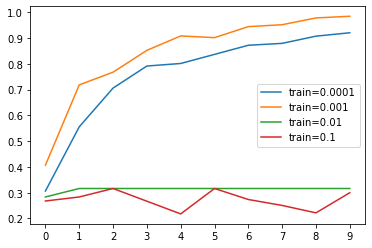

In [22]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))
    #plt.plot(hist['val_accuracy'], label=('val=%s' % lr))
#plt.ylim(0.7,1.0)
plt.xticks(np.arange(10))
plt.legend()

**Learning rate=0.001**

## 2. Inner Layer Size

In [23]:
def make_model(learning_rate=0.001, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    flatvectors = keras.layers.Flatten()(vectors)
    inner = keras.layers.Dense(size_inner, activation='relu')(flatvectors)
    outputs = keras.layers.Dense(6,activation='softmax')(inner)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=False)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [25]:
learning_rate = 0.001

scores = {}

for size_inner in [50, 100, 200, 500]:
    print(size_inner)

    model = make_model(learning_rate=learning_rate, size_inner=size_inner)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size_inner] = history.history

    print()
    print()

50
Epoch 1/10
61/61 [==============================] - 41s 625ms/step - loss: 1.8820 - accuracy: 0.3402 - val_loss: 1.4457 - val_accuracy: 0.3531
Epoch 2/10
61/61 [==============================] - 37s 605ms/step - loss: 1.2318 - accuracy: 0.5218 - val_loss: 1.0897 - val_accuracy: 0.5951
Epoch 3/10
61/61 [==============================] - 39s 629ms/step - loss: 0.8371 - accuracy: 0.7387 - val_loss: 0.7675 - val_accuracy: 0.7481
Epoch 4/10
61/61 [==============================] - 39s 646ms/step - loss: 0.5135 - accuracy: 0.8505 - val_loss: 0.6943 - val_accuracy: 0.7605
Epoch 5/10
61/61 [==============================] - 39s 630ms/step - loss: 0.4704 - accuracy: 0.8595 - val_loss: 0.5639 - val_accuracy: 0.8000
Epoch 6/10
61/61 [==============================] - 39s 632ms/step - loss: 0.3372 - accuracy: 0.8956 - val_loss: 0.5209 - val_accuracy: 0.8296
Epoch 7/10
61/61 [==============================] - 39s 645ms/step - loss: 0.2742 - accuracy: 0.9252 - val_loss: 0.4775 - val_accuracy: 0.8

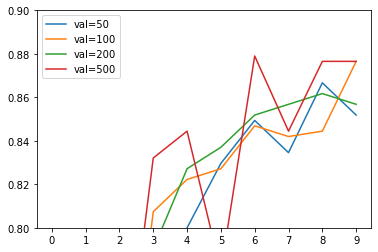

In [27]:
for size_inner, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size_inner))

plt.ylim(0.8,0.9)
plt.xticks(np.arange(10))
plt.legend()

In [28]:
learning_rate = 0.001

scores = {}

for size_inner in [100, 500]:
    print(size_inner)

    model = make_model(learning_rate=learning_rate, size_inner=size_inner)
    history = model.fit(train_ds, epochs=15, validation_data=val_ds)
    scores[size_inner] = history.history

    print()
    print()

100
Epoch 1/15
61/61 [==============================] - 42s 649ms/step - loss: 1.8641 - accuracy: 0.3221 - val_loss: 1.3650 - val_accuracy: 0.3630
Epoch 2/15
61/61 [==============================] - 38s 624ms/step - loss: 1.1563 - accuracy: 0.5678 - val_loss: 0.9813 - val_accuracy: 0.6741
Epoch 3/15
61/61 [==============================] - 38s 614ms/step - loss: 0.7727 - accuracy: 0.7338 - val_loss: 0.8054 - val_accuracy: 0.7309
Epoch 4/15
61/61 [==============================] - 37s 609ms/step - loss: 0.5223 - accuracy: 0.8324 - val_loss: 0.5829 - val_accuracy: 0.8074
Epoch 5/15
61/61 [==============================] - 38s 626ms/step - loss: 0.4182 - accuracy: 0.8587 - val_loss: 0.6065 - val_accuracy: 0.8247
Epoch 6/15
61/61 [==============================] - 36s 598ms/step - loss: 0.2955 - accuracy: 0.9178 - val_loss: 0.4819 - val_accuracy: 0.8395
Epoch 7/15
61/61 [==============================] - 37s 609ms/step - loss: 0.2372 - accuracy: 0.9392 - val_loss: 0.5823 - val_accuracy: 0.

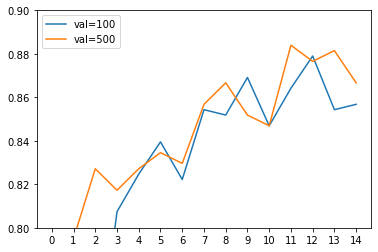

In [30]:
for size_inner, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size_inner))

plt.ylim(0.8,0.9)
plt.xticks(np.arange(15))
plt.legend()

**Inner size=500**

# Regularization and Dropout

* Regularizing by freezing a part of the network
* Adding dropout to our model
* Experimenting with different values

In [31]:
def make_model(learning_rate=0.01, size_inner=500, drop_rate=0.5):
    base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    flatvectors = keras.layers.Flatten()(vectors)
    inner = keras.layers.Dense(size_inner, activation='relu')(flatvectors)
    drop = keras.layers.Dropout(drop_rate)(inner)
    outputs = keras.layers.Dense(6,activation='softmax')(drop)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=False)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    #########################################

    return model
    

In [33]:
learning_rate = 0.001
size_inner = 500

scores = {}

for drop_rate in [0.0, 0.2, 0.5, 0.8]:
    print(drop_rate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size_inner,
        drop_rate=drop_rate
    )

    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[drop_rate] = history.history

    print()
    print()

0.0
Epoch 1/10
61/61 [==============================] - 42s 643ms/step - loss: 1.7972 - accuracy: 0.5086 - val_loss: 0.9001 - val_accuracy: 0.7309
Epoch 2/10
61/61 [==============================] - 38s 630ms/step - loss: 0.8149 - accuracy: 0.7091 - val_loss: 0.8994 - val_accuracy: 0.6864
Epoch 3/10
61/61 [==============================] - 37s 615ms/step - loss: 0.5748 - accuracy: 0.8069 - val_loss: 0.5265 - val_accuracy: 0.8074
Epoch 4/10
61/61 [==============================] - 37s 614ms/step - loss: 0.2840 - accuracy: 0.9080 - val_loss: 0.5678 - val_accuracy: 0.8123
Epoch 5/10
61/61 [==============================] - 38s 611ms/step - loss: 0.2811 - accuracy: 0.9104 - val_loss: 0.4282 - val_accuracy: 0.8691
Epoch 6/10
61/61 [==============================] - 37s 609ms/step - loss: 0.1513 - accuracy: 0.9647 - val_loss: 0.4375 - val_accuracy: 0.8667
Epoch 7/10
61/61 [==============================] - 38s 619ms/step - loss: 0.1178 - accuracy: 0.9671 - val_loss: 0.4137 - val_accuracy: 0.

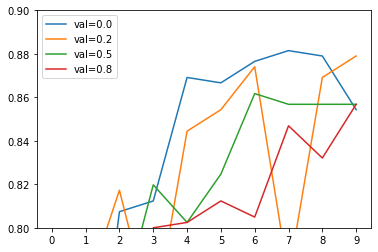

In [38]:
for drop_rate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % drop_rate))

plt.ylim(0.8, 0.9)
plt.xticks(np.arange(10))
plt.legend()

**Drop Rate=0.2**

No handles with labels found to put in legend.


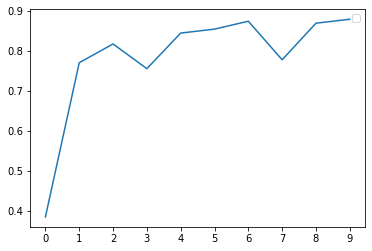

In [39]:
hist = scores[0.2]
plt.plot(hist['val_accuracy'])
plt.xticks(np.arange(10))
plt.legend()

# Augmentation

In [40]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    vertical_flip=True,
    fill_mode='nearest'
    )

train_ds = train_gen.flow_from_directory(
    './yoga-posture-cleaned/train',
    target_size=(150, 150),
    batch_size=20,
    shuffle=False
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './yoga-posture-cleaned/validation',
    target_size=(150, 150),
    batch_size=20,
    shuffle=False
)

Found 1217 images belonging to 6 classes.
Found 405 images belonging to 6 classes.


In [41]:
learning_rate = 0.001 
size_inner = 500
drop_rate = 0.2
#########################################

base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False

#########################################
inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs, training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
flatvectors = keras.layers.Flatten()(vectors)
inner = keras.layers.Dense(size_inner, activation='relu')(flatvectors)
outputs = keras.layers.Dense(6,activation='softmax')(inner)
model = keras.Model(inputs, outputs)

#########################################

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
loss = keras.losses.CategoricalCrossentropy(from_logits=False)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

#########################################

history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
61/61 [==============================] - 47s 730ms/step - loss: 2.4817 - accuracy: 0.2243 - val_loss: 1.4932 - val_accuracy: 0.5062
Epoch 2/10
61/61 [==============================] - 43s 701ms/step - loss: 1.5771 - accuracy: 0.3829 - val_loss: 1.2125 - val_accuracy: 0.6296
Epoch 3/10
61/61 [==============================] - 42s 682ms/step - loss: 1.3956 - accuracy: 0.4988 - val_loss: 1.2963 - val_accuracy: 0.4519
Epoch 4/10
61/61 [==============================] - 42s 695ms/step - loss: 1.3492 - accuracy: 0.4659 - val_loss: 1.1287 - val_accuracy: 0.6000
Epoch 5/10
61/61 [==============================] - 43s 688ms/step - loss: 1.2788 - accuracy: 0.5283 - val_loss: 1.1324 - val_accuracy: 0.5704
Epoch 6/10
61/61 [==============================] - 43s 708ms/step - loss: 1.1206 - accuracy: 0.6015 - val_loss: 1.0195 - val_accuracy: 0.6198
Epoch 7/10
61/61 [==============================] - 42s 687ms/step - loss: 1.1455 - accuracy: 0.5727 - val_loss: 0.8827 - val_accuracy: 0.6691

No handles with labels found to put in legend.


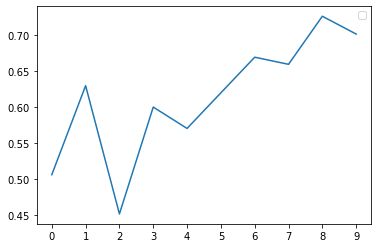

In [44]:
plt.plot(history.history['val_accuracy'])
plt.xticks(np.arange(10))
plt.legend()

# Checkpointing

* Saving the best model only
* Training a model with callbacks

In [45]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './yoga-posture-cleaned/train',
    target_size=(150, 150),
    batch_size=20,
    shuffle=False
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './yoga-posture-cleaned/validation',
    target_size=(150, 150),
    batch_size=20,
    shuffle=False
)

Found 1217 images belonging to 6 classes.
Found 405 images belonging to 6 classes.


In [46]:
def make_model(learning_rate=0.01, size_inner=100, drop_rate=0.2):
    base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    flatvectors = keras.layers.Flatten()(vectors)
    inner = keras.layers.Dense(size_inner, activation='relu')(flatvectors)
    drop = keras.layers.Dropout(drop_rate)(inner)
    outputs = keras.layers.Dense(6,activation='softmax')(drop)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=False)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    #########################################

    return model

In [47]:
model.save_weights('model_v1.h5', save_format='h5')

In [48]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'yoga_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [49]:
learning_rate = 0.001
size_inner = 500
drop_rate = 0.2

model = make_model(
        learning_rate=learning_rate,
        size_inner=size_inner,
        drop_rate=drop_rate
    )

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
61/61 [==============================] - 41s 623ms/step - loss: 2.2768 - accuracy: 0.3385 - val_loss: 1.0319 - val_accuracy: 0.6642
Epoch 2/10
61/61 [==============================] - 37s 607ms/step - loss: 0.8279 - accuracy: 0.7083 - val_loss: 0.6836 - val_accuracy: 0.7654
Epoch 3/10
61/61 [==============================] - 37s 607ms/step - loss: 0.5517 - accuracy: 0.8184 - val_loss: 0.6458 - val_accuracy: 0.7852
Epoch 4/10
61/61 [==============================] - 37s 611ms/step - loss: 0.3937 - accuracy: 0.8644 - val_loss: 0.5411 - val_accuracy: 0.7951
Epoch 5/10
61/61 [==============================] - 37s 609ms/step - loss: 0.3967 - accuracy: 0.8694 - val_loss: 0.4750 - val_accuracy: 0.8494
Epoch 6/10
61/61 [==============================] - 37s 604ms/step - loss: 0.2000 - accuracy: 0.9458 - val_loss: 0.5369 - val_accuracy: 0.8321
Epoch 7/10
61/61 [==============================] - 37s 610ms/step - loss: 0.1842 - accuracy: 0.9359 - val_loss: 0.5029 - val_accuracy: 0.8395

**Best Model 'yoga_08_0.862.h5'**

# Use the Model

In [54]:
from tensorflow.keras.preprocessing.image import load_img

In [50]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './yoga-posture-cleaned/test',
    target_size=(150, 150),
    batch_size=20,
    shuffle=False
)

Found 406 images belonging to 6 classes.


In [51]:
model = keras.models.load_model('yoga_08_0.862.h5')

In [52]:
path = './yoga-posture-cleaned/test/downdog/downdog101.jpg'

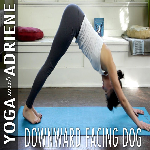

In [55]:
img = load_img(path, target_size=(150, 150))
img

In [56]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 150, 150, 3)

In [57]:
X = preprocess_input(X)

In [58]:
pred = model.predict(X)

In [59]:
classes = [
    'chair', 
    'cobra', 
    'downdog', 
    'goddess', 
    'tree', 
    'warrior']

In [60]:
dict(zip(classes, pred[0]))

{'chair': 7.7301534e-05,
 'cobra': 7.975984e-05,
 'downdog': 0.9998079,
 'goddess': 1.6248295e-07,
 'tree': 1.1697032e-06,
 'warrior': 3.3702236e-05}